In [ ]:
# 기본 옵션
options(warn = -1)
options(repr.plot.width=15, repr.plot.height=9)
options(scipen = 100)
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8")

# 가설 검정(TEST)
### 카이제곱 검정
- 두 범주형 변수가 서로 상관이 있는지 판단하는 통계적 검정 방법

    범주형 변수의 예시 : 학력, 성별, 직업의 만족도


### child별 장난감 보유 현황
- 귀무가설(누가봐도 당연한 가설) : child1과 child2의 장난감 보유수에 대한 만족도는 차이가 없다.

- 대립가설 : child1과 child2의 장난감 보유수에 대한 만족도의 차이가 있다. 대립가설로 판명이 나야 분석이 시작된다.

In [2]:
# child별 장난감 보유 현황
child1 <- c(5,11,1)
child2 <- c(4,7,3)

In [3]:
# 분석을 위해 데이터 합치기
Toy <- cbind(child1,child2)
# 행의 이름
rownames(Toy) <- c('car','truck','doll')

In [4]:
# 카이제곱 검정
chisq.test(Toy)
# X-sqared : 분산
# df : 
# p-value :

Warning message in chisq.test(Toy):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  Toy
X-squared = 1.7258, df = 2, p-value = 0.4219


### 결론 
p-value = 0.4219 > 0.05 (유의수준 : 95%의 신뢰구간) --> 귀무가설
child1과 child2의 데이터는 통계적으로 큰 차이가 없다.

---
- p-value는 0에 가까울수록 좋다.<br>
    미리 정해진 유의수준(일반적으로 0.05)보다 작으면 <b>대립가설</b>을 채택하고 크면 <b>귀무가설</b>을 채택한다.

- df=2 : 검정에서 사용된 자유도는 2이다.<br>
    카이제곱 검정의 자유도는 3개의 범주가 있다면 자유도는 3-1 = 2가 된다.

### Warning
데이터량의 적은 경우 발생

--> 피셔검정 : 표본수가 적거나 데이터의 분포가 치우친 경우

In [6]:
# 피셔 검정
fisher.test(Toy)


	Fisher's Exact Test for Count Data

data:  Toy
p-value = 0.5165
alternative hypothesis: two.sided


p-value = 0.5165 > 0.05 -> 귀무가설
대립가설 : 대립가설은 'two.sided'로 설정되어 있어 양측검정을 나타낸다. 

In [ ]:
# 상관계수
cor(child1,child2)

# T - 검정

In [14]:
# 귀무가설 : 건전지의 수명은 1000시간이다.
# 대립가설 : 건전지의 수명은 1000시간이 아니다.

In [18]:
# 데이터의 분포가 정규분포인지 확인 (Shapiro-Wilk 검정)
# 귀무가설 : 자료가 정규분포에 따른다.
# 대립가설 : 자료가 정규분포를 따르지 않는다.
bat <- c(980, 1008, 968, 1032, 1012, 1002, 996, 1017)
shapiro.test(bat)


	Shapiro-Wilk normality test

data:  bat
W = 0.97706, p-value = 0.9469


p-value = 0.9469 > 0.05 -> 귀무가설

W = 0.97706 값이 1에 수렴할수록 정규성에 가깝다.

In [19]:
# T-검정
t.test(bat, mu = 1000, alternative = "two.sided")

# mu : 비교하는 대상의 평균
# alternative
# (1) two.sided : 데이터가 평균과 다르다.
# (2) greater : 데이터가 평균보다 크다.
# (3) less : 데이터가 평균보다 작다.


	One Sample t-test

data:  bat
t = 0.25891, df = 7, p-value = 0.8032
alternative hypothesis: true mean is not equal to 1000
95 percent confidence interval:
  984.7508 1018.9992
sample estimates:
mean of x 
 1001.875 


p-value = 0.8032 > 0.05 -> 귀무가설



In [43]:
# 어떤 학급의 수학 점수 평균 : 55점
# 0교시 수업을 한 후에 학생들의 성적이 올랐을까?
# 귀무가설 : 성적이 오르지 않았다.
# 대립가설 : 성직이 올랐다.
exam <- read.csv("Data/exam.csv")
summary(exam$score)

shapiro.test(exam$score)
t.test(exam$score, mu =  55, alternative = "greater")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  30.00   42.00   55.00   56.18   62.00   99.00 


	Shapiro-Wilk normality test

data:  exam$score
W = 0.91143, p-value = 0.1058



	One Sample t-test

data:  exam$score
t = 0.24546, df = 16, p-value = 0.4046
alternative hypothesis: true mean is greater than 55
95 percent confidence interval:
 47.80855      Inf
sample estimates:
mean of x 
 56.17647 


## T-검정의 결과
p-value = 0.4046 > 0.05 -> 귀무가설, 따라서 점수는 오르지 않은 것이다.

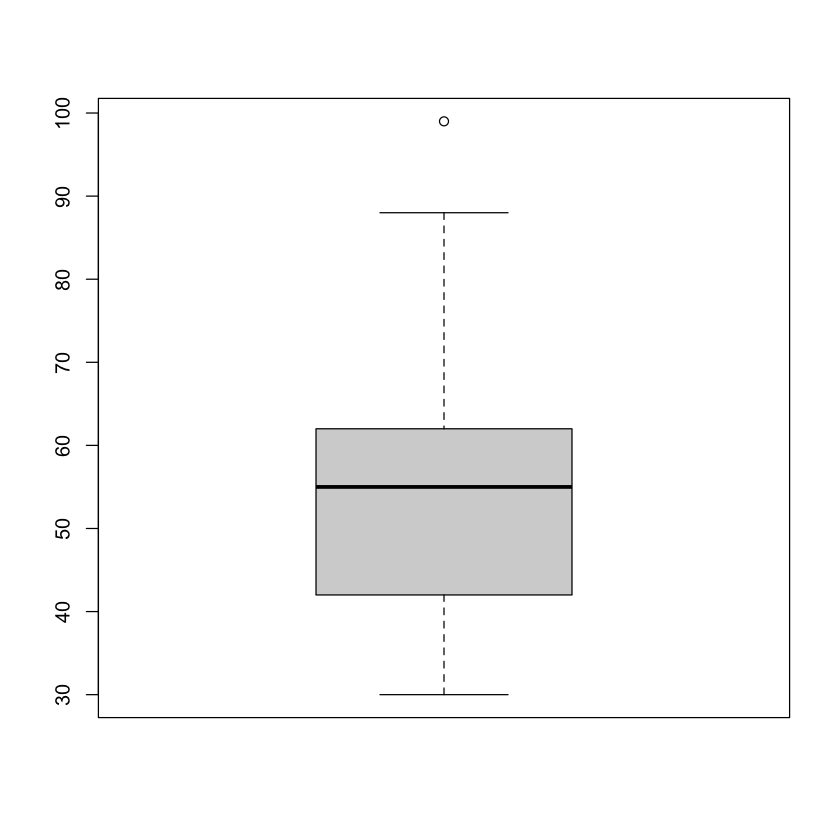

In [46]:
par(bg='white')
boxplot(
    exam$score
)

In [49]:
t.test(exam[-4,]$score,mu=55,alternative = "greater")


	One Sample t-test

data:  exam[-4, ]$score
t = -0.35437, df = 15, p-value = 0.636
alternative hypothesis: true mean is greater than 55
95 percent confidence interval:
 46.07967      Inf
sample estimates:
mean of x 
     53.5 


In [ ]:
# 표본이 2개인 t-검정
# 귀무가설 : 복용 전후의 차이가 없다.
# 대립가설 : 복용 전후의 차이가 있다.

preMedicine <- read.csv("Data/preMedicine.csv")
postMedicine <- read.csv("Data/postMedicine.csv")

pre <- preMedicine$data
post <- postMedicine$data
mean(pre)
mean(post)

In [65]:
shapiro.test(pre)
t.test(pre,post,alternative = "two.sided")


	Shapiro-Wilk normality test

data:  pre
W = 0.9624, p-value = 0.8129



	Welch Two Sample t-test

data:  pre and post
t = -0.36891, df = 17.987, p-value = 0.7165
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.745046  1.925046
sample estimates:
mean of x mean of y 
    10.63     11.04 


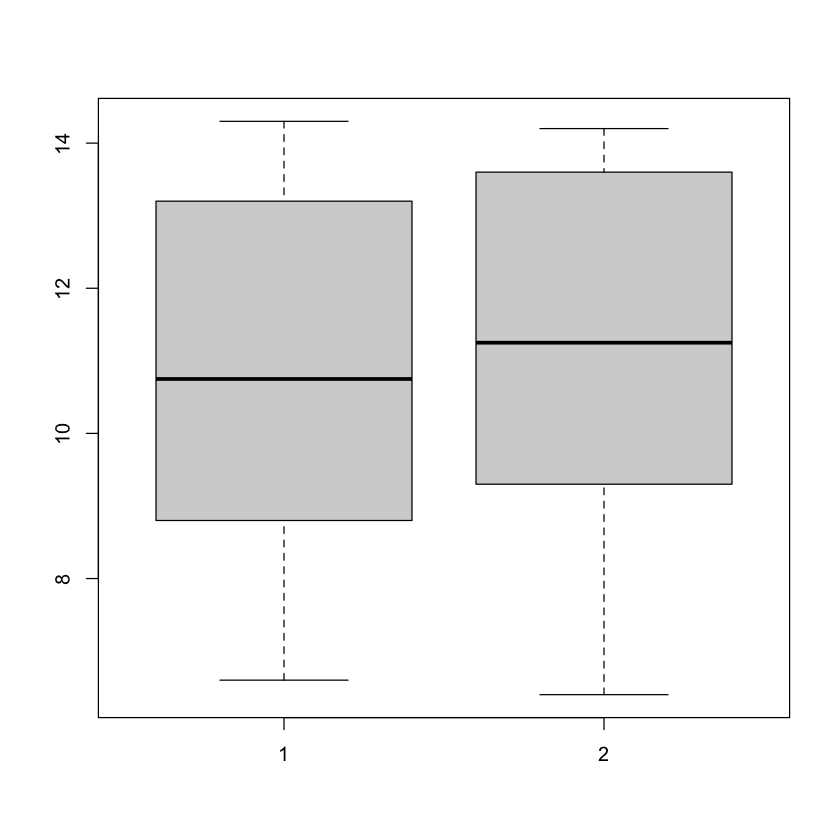

In [61]:
par(bg = 'white')
boxplot(
    pre,post
)

# 상관관계

In [69]:
y <- c(1,2,3,4)
z <- c(0,5,7,9)
cor(y,z)

[1] 0.9693631

In [73]:
# 피어슨 상관계수
cor(y,z, method = "pearson")

# 스피어맨 상관계수
cor(y,z, method = "spearman")

[1] 0.9693631

[1] 1

## 콜모고로프-스미노프 검정(KS-TEST)
- 주어진 2개의 데이터가 같은 분포를 갖는지를 검정

In [74]:
# 귀무가설 : 2개의 데이터의 분포가 같다.
# 대립가설 : 2개의 데이터의 분포가 다르다.

In [101]:
x <- rnorm(50)
y <- runif(50)

ks.test(x,y)

par(bg = 'white')
plot(x)
plot(y)

p-value = 1.581e-06 < 0.05 --> 대립가설

# 부호 검정 (식품에서 주로 사용)
- 2개의 데이터 사이에 차이가 있는지 검정하는것

In [108]:
# 식사전과 식사후의 음료수 맛에 대한 평가
x <- c(4, 1, 1, 4, 3, 3, 2, 5, 3, 3) # 식사 전
y <- c(1, 1, 3, 2, 5, 1, 4, 4, 3, 1) # 식사 후

In [109]:
# 귀무가설 : 유의한 차이가 없다.
# 대립가설 : 유의한 차이가 있다.

In [112]:
binom.test(c(length(x[x>y]),length(x[x<y])))


	Exact binomial test

data:  c(length(x[x > y]), length(x[x < y]))
number of successes = 5, number of trials = 8, p-value = 0.7266
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.2448632 0.9147666
sample estimates:
probability of success 
                 0.625 


p-value = 0.7266 > 0.05 --> 귀무가설

## 비율 검정(비율이 일정한지를 확인)
- 2개 데이터 사이에 비율의 차이가 있는지를 검정

In [113]:
# "맥주를 좋아하시나요?" 라는 질문에 서울에서는 400명중 360명, 부산에서는 200명중 136명이 좋아한다고 답했다면, 둘의 비율의 차이가 있다고 할 수 있는가?

# 귀무가설 : 유의한 차이가 없다.
# 대립가설 : 유의한 차이가 있다.

In [115]:
hite <- c(360, 136)
samp <- c(400, 200)

prop.test(hite,samp)


	2-sample test for equality of proportions with continuity correction

data:  hite out of samp
X-squared = 43.515, df = 1, p-value = 0.00000000004207
alternative hypothesis: two.sided
95 percent confidence interval:
 0.14523 0.29477
sample estimates:
prop 1 prop 2 
  0.90   0.68 


p-value = 0.00000000004207 < 0.05 --> 대립가설